In [3]:
import pandas as pd


In [9]:
import requests
from io import StringIO
from textblob import TextBlob
import nltk 
from textblob.sentiments import NaiveBayesAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download("movie_reviews")
nltk.download("punkt")

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [1]:
import pandas as pd

url = 'https://drive.google.com/file/d/15X00ZWBjla7qGOIW33j8865QdF89IyAk/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

In [ ]:
df.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


In [4]:
df.info(verbose =False , memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509236 entries, 0 to 509235
Columns: 8 entries, time_created to category
dtypes: bool(1), int64(3), object(4)
memory usage: 186.8 MB


In [ ]:
unique_auths = len(df['author'].unique())
upvotes = df['up_votes']

Since the number down votes are 0 for each row , we will ignore it 

In [3]:
df['down_votes'].mean()

0.0

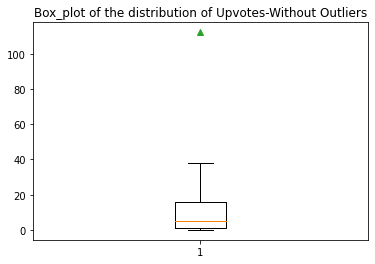

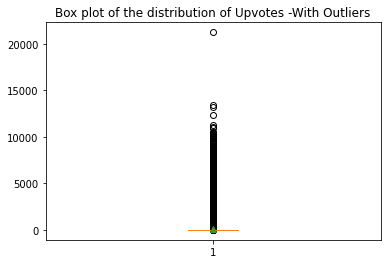

In [ ]:

plt.boxplot(upvotes , showbox =True , showmeans= True , showfliers= False)
plt.title("Box_plot of the distribution of Upvotes-Without Outliers")
plt.show()

plt.boxplot(upvotes , showbox =True , showmeans =True )
plt.title("Box plot of the distribution of Upvotes -With Outliers")
plt.show()

21253

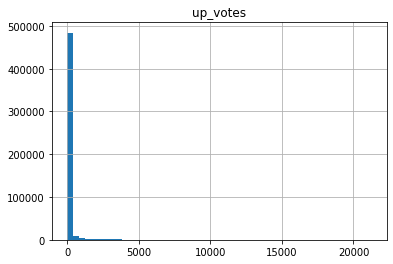

In [7]:
df.hist(column='up_votes',bins=50)
print(df['up_votes'].max())

In [ ]:
titles = df['title']
titles[178]

'Iraq: The Three Trillion Dollar War'

Now What I intend to do is use the pretrained Sentiment analyzer by Textblob to get the "Positive trait" of the headline and use it to predict the number of upvotes .This is based upon a Naive bayes classifier and was taking lot of time to compile and Colab kept on crashing , so I tried this for 1000 inital headlines

In [ ]:
pos =191
blob = TextBlob(titles[pos], analyzer=NaiveBayesAnalyzer())
blob.sentiment

0.00020051002502441406


In [ ]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import pandas as pd
#evals = {"Headline":[],"classification":[],"pos":[] , "neg": []};
res = []
count =0
for t in titles[0:1000]:
  blob = TextBlob(t,analyzer=NaiveBayesAnalyzer())
  sentiment =blob.sentiment
  res.append(sentiment) 
  count+=1
  print(count) 

nlp_results1 = pd.DataFrame(res)

nlp_results1.to_csv("nlp_results1.csv.zip", 
           index=False, 
           compression="zip") # Saved it to nlp_results.csv(present in the repo)
           

In [ ]:
postive_val =nlp_results1[['p_pos']
upvotes = df['up_votes'][0:1000]

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X = postive_val
Y = np.array(upvotes)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

'''regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
#regr.score(X,y)'''
data = pd.DataFrame(X_train)
#np.reshape(X_train,(-1,1))
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(data, y_train)
#reg.score(X_train ,y_train)
reg.score(data , y_train)

0.003065865414253355

In [ ]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
#regr.score(X,y)'''
#regr.score(X_test, y_test)
preds2 = regr.predict(X_test)
#y_test[14]
np.corrcoef(preds2 , y_test)

array([[1.        , 0.08306429],
       [0.08306429, 1.        ]])

In [ ]:
np.corrcoef(postive_val,upvotes)

In [ ]:
import gensim

In [ ]:
from gensim.models import KeyedVectors
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')
#Could use Word2vec pretrained model but will train my own this dataset

[--------------------------------------------------] 0.6% 9.3/1662.8MB downloaded

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



Now I will make my own Skip-gram Word Embedding using Gensim

In [13]:
import os
import sys
import re
from gensim.models import Word2Vec
from gensim.models.phrases import Phraser, Phrases

In [10]:
all_text = df["title"]
import spacy
import nltk 
import nltk
tokens = []
for k in all_text:
   t= nltk.word_tokenize(k)
   tokens.append(t)

In [11]:
tokens[0]

['Scores', 'killed', 'in', 'Pakistan', 'clashes']

In [ ]:
import re
sentences = []
for ii in range(len(all_text)):
    sentences = [re.sub(pattern=r'[\!"#$%&\*+,-./:;<=>?@^_`()|~=]', 
                        repl='', 
                        string=x
                       ).strip().split(' ') for x in all_text[ii].split('\n') 
                      if not x.endswith('writes:')]
    sentences = [x for x in sentences if x != ['']]
    all_text[ii] = sentences

In [ ]:
cleansed_text = pd.DataFrame(data = all_text)
da = cleansed_text.to_csv("cleansed_text.csv")

In [ ]:
text_concat =[]
for t in all_text:
  text_concat += t
  

In [ ]:
common_terms = ["of", "with", "without", "and", "or", "the", "a"]
# Create the relevant phrases from the list of sentences:
phrases = Phrases(all_sentences, common_terms=common_terms)
# The Phraser object is used from now on to transform sentences
bigram = Phraser(phrases)
all_sentences = list(bigram[all_sentences])

In [ ]:
model = Word2Vec(all_sentences, 
                 min_count=2,   
                 size=200,      
                 workers=2,     
                 window=5,      
                 iter=20)

In [ ]:
 model.save("word2vec_emb.model")

In [ ]:
model.most_similar("guns")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('rifles', 0.6949822306632996),
 ('grenades', 0.681470513343811),
 ('assault_rifles', 0.6491257548332214),
 ('bullets', 0.6389783620834351),
 ('knives', 0.620452880859375),
 ('ammunition', 0.6035146713256836),
 ('automatic_weapons', 0.5659435987472534),
 ('machine_guns', 0.565159261226654),
 ('gun', 0.5527080297470093),
 ('cameras', 0.5453432202339172)]

In [ ]:
vocab = model.wv.vocab
vocab_len = len(model.wv.vocab)

In [ ]:
model.most_similar("japan")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('Japan_Tsunami', 0.684653103351593),
 ('Japan_tsunami', 0.6425794363021851),
 ('60magnitude', 0.6363587379455566),
 ('Honshu_Japan', 0.6308411955833435),
 ('Samoa', 0.6302562355995178),
 ('Solomon_Islands', 0.6166073679924011),
 ('75magnitude', 0.6139359474182129),
 ('Toowoomba', 0.6137255430221558),
 ('southern_hemisphere', 0.6113868951797485),
 ('Kanto', 0.6064375042915344)]

In [ ]:
model.predict_output_word("To be ")

[('World_War', 0.12174945),
 ('have', 0.008736979),
 ('got', 0.0056604524),
 ('Have', 0.005578417),
 ('missed', 0.0040365485),
 ('picture', 0.0032372978),
 ('I_know', 0.0028593857),
 ('did', 0.0027052774),
 ('smell', 0.0025204648),
 ('my', 0.0024354025)]

In [ ]:
model2 = Word2Vec.load("word2vec_emb.model")
                       # Load the same model , included in the repo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


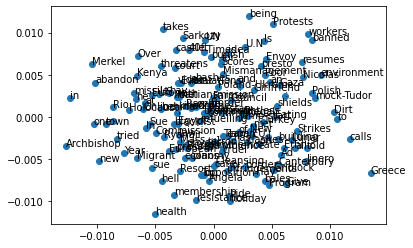

In [17]:
#Visualization of the trained_ Word2Vec model
from sklearn.decomposition import PCA
from matplotlib import pyplot
'''s = [['this', 'is', 'the', 'first', 'sentence', 'for', 'Japan'],
			['I', 'have', 'to', 'go', 'to' , 'USA'],
			['They', 'got', 'guns'],
			['Who', 'is', 'Trump'],
			['and', 'the', 'final', 'sentence']]'''
s = tokens[0:20]

model_ = Word2Vec(s, min_count=1)
X = model_[model_.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model_.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [ ]:
new_df = pd.DataFrame(data = all_text)
new_df.to_csv("cleaned_text.csv")

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import RootMeanSquaredError

In [6]:
titles= df['title']

In [7]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
#MAX_NB_WORDS = 
tokenizer = Tokenizer()
#tokens =tokenizer.texts_to_sequences(titles)
tokens2 =tokenizer.fit_on_texts(titles)

In [ ]:
X = tokenizer.texts_to_sequences(titles)
#X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
#print('Shape of data tensor:', X.shape)
lengths = [len(j) for j in X]
MAX_SEQUENCE_LENGTH = max(lengths)
MAX_SEQUENCE_LENGTH += 2   # A Simple Addition for safety

X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

In [ ]:
from sklearn.model_selection import train_test_split
Y = df['up_votes']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10)


In [8]:
#dd = tokenizer.texts_to_matrix(titles[0:10000])

In [9]:
Y = df['up_votes'][0:10000]

In [ ]:
model = Sequential()
model.add(Embedding(vocab_len,200,input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
#model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(50, activation='softmax'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=["mae", "acc"])

epochs = 5
batch_size = 32

model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
12890/12890 [==============================] - 2434s 188ms/step - loss: 313242.0184 - mae: 113.0842 - acc: 0.0959 - val_loss: 274769.8125 - val_mae: 111.6321 - val_acc: 0.0897
Epoch 2/5
12890/12890 [==============================] - 2425s 188ms/step - loss: 308008.3027 - mae: 120.4651 - acc: 0.0924 - val_loss: 272054.3750 - val_mae: 122.2172 - val_acc: 0.0897
Epoch 3/5
12890/12890 [==============================] - 2435s 189ms/step - loss: 301362.1226 - mae: 129.3780 - acc: 0.0922 - val_loss: 270123.5312 - val_mae: 132.8480 - val_acc: 0.0897
Epoch 4/5
12890/12890 [==============================] - 2440s 189ms/step - loss: 302624.7825 - mae: 141.5240 - acc: 0.0923 - val_loss: 268843.0312 - val_mae: 142.3271 - val_acc: 0.0897
Epoch 5/5
12890/12890 [==============================] - 2453s 190ms/step - loss: 299316.4094 - mae: 149.4760 - acc: 0.0916 - val_loss: 268023.2188 - val_mae: 150.4585 - val_acc: 0.0897


In [ ]:
model.save("nlp_model.h5")

In [ ]:
from tensorflow import keras
model_loaded = keras.models.load_model('nlp_model.h5')

In [ ]:
weights_list = model.get_weights()

In [ ]:
emb_layer = weights_list[0]

In [ ]:
import numpy as np
preds = model.predict(X_test)
RootMeanSquaredError(preds , Y_test)

The LSTM based model didn't perform well at all, I have used another approach in another notebook